In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
%matplotlib inline

# Define the activation functions in numpy

In [2]:
def mish(x):
    return x*np.tanh(np.log(1+np.exp(x)))

In [3]:
def hard_swish(x,a_max=6,amin=0,add=3,divide=6):
    return x*np.clip(x+add,a_min=amin,a_max=a_max)/divide

In [4]:
def swish(x):
    return (x*np.exp(x))/(np.exp(x)+1)

# Plot mish, hard-swish, and swish

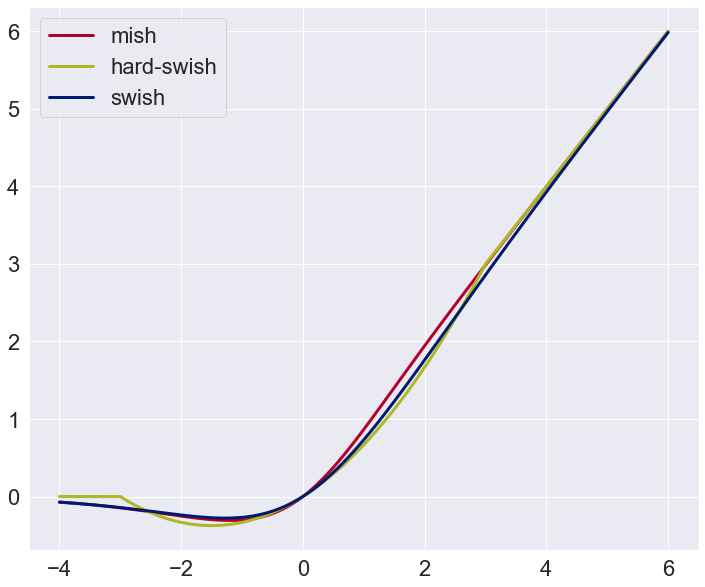

In [5]:
x = np.linspace(-4, 6, num=1000)
y_mish = mish(x)
y_hard_swish = hard_swish(x)
y_swish = swish(x)
fig,ax = plt.subplots(1, 1, figsize=(12,10))
ax.plot(x,y_mish,label='mish',lw=3,color='#b5002e');
ax.plot(x,y_hard_swish,label='hard-swish',lw=3,color='#afb723');
ax.plot(x,y_swish,label='swish',lw=3,color='#001b6e');
ax.legend();

# Find a good approximation for hard-mish

Lets use trial and error to find a good approximation of mish. I am going to use the function for hard-swish, but alter the max value for the relu function (from 6), the divisor (from 6), and the term added to x (from 3). I will randomly alter these and select the best fit via the mean-squared error.

In [6]:
np.random.seed(seed=42)
s = 100000
add = 3+np.random.uniform(low=-2, high=2, size=s)
divide = 6+np.random.uniform(low=-2, high=2, size=s)
a_max = np.random.randint(1,10,size=s)
x_matrix = x.reshape(-1,1)
y_swish = (x_matrix*np.divide(np.clip(x_matrix+add,a_min=0,a_max=a_max),divide))
mean_sq_error = ((y_swish - y_mish.reshape(-1,1))**2).mean(axis=0)
idx_min = mean_sq_error.argmin()
add_factor = add[idx_min]
divide_factor = divide[idx_min]
relu_factor = a_max[idx_min]
mean_sq_error_av = mean_sq_error.min()
print('Mean squared error:',mean_sq_error_av)
print('Add factor:',add_factor)
print('Divide factor:',divide_factor)
print('Max for relu',relu_factor)

Mean squared error: 0.004157302088302411
Add factor: 2.843862704928061
Divide factor: 4.990494357571917
Max for relu 5


# A good approximation for mish seems to be x.Relu5(x+3)/5 when rounded.

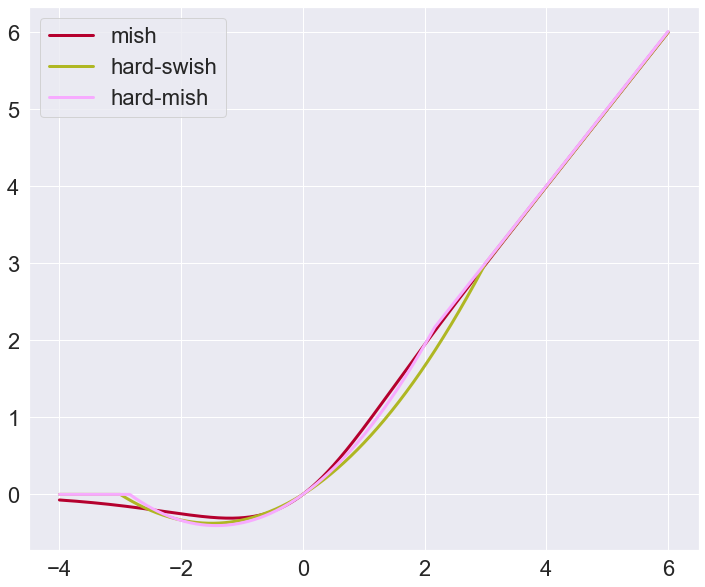

In [7]:
x = np.linspace(-4, 6, num=1000)
y_mish = mish(x)
y_swish = swish(x)
y_hard_swish = hard_swish(x)
y_hard_mish = hard_swish(x,add=add_factor,divide=divide_factor,a_max=relu_factor)
fig,ax = plt.subplots(1, 1, figsize=(12,10));
ax.plot(x,y_mish,label="mish",lw=3,color='#b5002e');
ax.plot(x,y_hard_swish,label="hard-swish",lw=3,color='#afb723');
ax.plot(x,y_hard_mish,label="hard-mish",lw=3,color='#f7abff');
ax.legend();

# Would the same family of hard-activation functions be good if extended, e.g. x.Relu4(x+3)/4?

If x.Relu6(x+3)/6 is a good approximation of the swish activation function... <br>
and x.Relu5(x+3)/5 is a good approxmiation of the mish activation function... <br>
would x.Relu4(x+3)/4 be a good activation function?

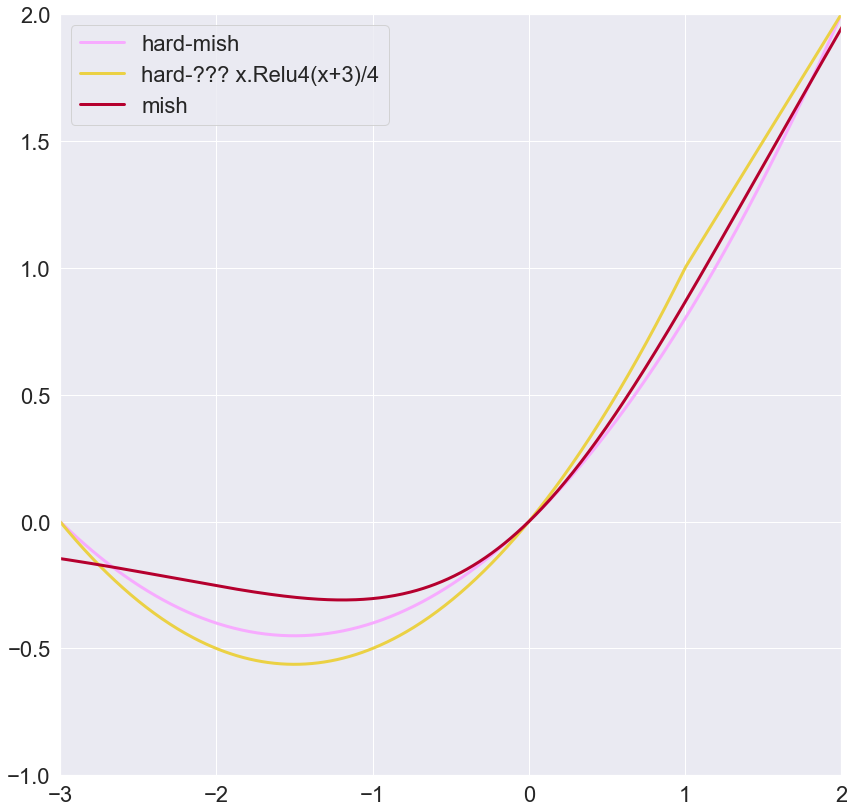

In [8]:
y_hard5 = hard_swish(x,add=3,divide=5,a_max=5)
y_hard4 = hard_swish(x,add=3,divide=4,a_max=4)
y_mish = mish(x)
fig,ax = plt.subplots(1, 1, figsize=(14,14));
ax.plot(x,y_hard5,label="hard-mish",lw=3,color='#f7abff');
ax.plot(x,y_hard4,label="hard-??? x.Relu4(x+3)/4",lw=3,color='#ebd144');
ax.plot(x,y_mish,label="mish",lw=3,color='#b5002e');
ax.set_xlim(-3,2);
ax.set_ylim(-1,2);
ax.legend();